# https://www.kaggle.com/imakash3011/customer-personality-analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [2]:
data = pd.read_csv('marketing_campaign.csv',sep='\t')
data.shape

(2240, 29)

In [3]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<AxesSubplot:>

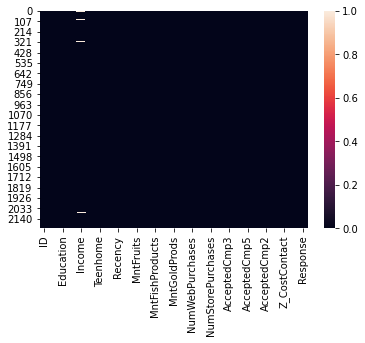

In [5]:
sns.heatmap(data.isna())

In [6]:
for x in data.columns:
    if data[x].isna().sum() > 0:
        print(x, data[x].isna().sum(),(data[x].isna().sum()/len(data))*100)

Income 24 1.0714285714285714


In [7]:
df = data.copy()

In [8]:
df = data.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [10]:
obj_col = [x for x in data.columns if data[x].dtype == 'O']
obj_col = df[obj_col]
obj_col

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10-02-2014
4,PhD,Married,19-01-2014
...,...,...,...
2235,Graduation,Married,13-06-2013
2236,PhD,Together,10-06-2014
2237,Graduation,Divorced,25-01-2014
2238,Master,Together,24-01-2014


In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

<ipython-input-11-5ede84e7ffb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [12]:
obj_col = [x for x in data.columns if data[x].dtype == 'O']
obj_col = df[obj_col]
obj_col

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,2012-04-09
1,Graduation,Single,2014-08-03
2,Graduation,Together,2013-08-21
3,Graduation,Together,2014-10-02
4,PhD,Married,2014-01-19
...,...,...,...
2235,Graduation,Married,2013-06-13
2236,PhD,Together,2014-10-06
2237,Graduation,Divorced,2014-01-25
2238,Master,Together,2014-01-24


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

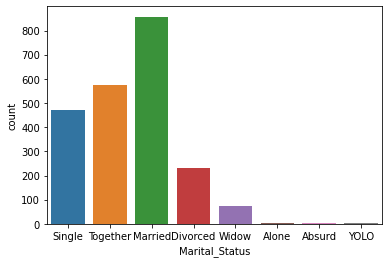

In [13]:
sns.countplot(x='Marital_Status',data=df)

In [14]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [15]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [16]:
def fix_martial_status(x):
    if x == 'YOLO' or x == 'Absurd':
        return 'N/A'
    elif x == 'Alone'  or x == 'Widow':
        return 'Single'
    elif x == 'Together':
        return 'Married'
    else:
        return x

In [17]:
df['Marital_Status'] = df['Marital_Status'].apply(fix_martial_status)

<ipython-input-17-03487199a596>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = df['Marital_Status'].apply(fix_martial_status)


In [18]:
df['Marital_Status'].value_counts()

Married     1430
Single       550
Divorced     232
N/A            4
Name: Marital_Status, dtype: int64

In [19]:
dummies = pd.get_dummies(df['Marital_Status'],prefix='Maritial_Status_',drop_first=True)
df = pd.concat([df.drop('Marital_Status',1),dummies],axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2216 non-null   int64         
 1   Year_Birth                2216 non-null   int64         
 2   Education                 2216 non-null   object        
 3   Income                    2216 non-null   float64       
 4   Kidhome                   2216 non-null   int64         
 5   Teenhome                  2216 non-null   int64         
 6   Dt_Customer               2216 non-null   datetime64[ns]
 7   Recency                   2216 non-null   int64         
 8   MntWines                  2216 non-null   int64         
 9   MntFruits                 2216 non-null   int64         
 10  MntMeatProducts           2216 non-null   int64         
 11  MntFishProducts           2216 non-null   int64         
 12  MntSweetProducts    

In [21]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

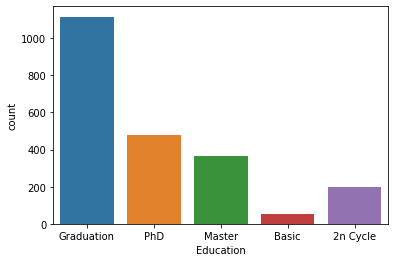

In [22]:
sns.countplot(x='Education',data=df)

In [23]:
# dummies = pd.get_dummies(df['Education'],prefix='Education_',drop_first=True)
# pd.concat([df.drop('Education',1),dummies],axis=1)

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
#df = df.dropna()

In [26]:
# df.isna().sum()

In [27]:
le = LabelEncoder()
edu = le.fit_transform(df['Education'])
df['Education'] = edu

In [28]:
df.tail()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Maritial_Status__Married,Maritial_Status__N/A,Maritial_Status__Single
2235,10870,1967,2,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,1,0,0
2236,4001,1946,4,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,1,0,0
2237,7270,1981,2,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,0,0,0
2238,8235,1956,3,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,1,0,0
2239,9405,1954,4,52869.0,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1,1,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2216 non-null   int64         
 1   Year_Birth                2216 non-null   int64         
 2   Education                 2216 non-null   int64         
 3   Income                    2216 non-null   float64       
 4   Kidhome                   2216 non-null   int64         
 5   Teenhome                  2216 non-null   int64         
 6   Dt_Customer               2216 non-null   datetime64[ns]
 7   Recency                   2216 non-null   int64         
 8   MntWines                  2216 non-null   int64         
 9   MntFruits                 2216 non-null   int64         
 10  MntMeatProducts           2216 non-null   int64         
 11  MntFishProducts           2216 non-null   int64         
 12  MntSweetProducts    

<AxesSubplot:xlabel='Response', ylabel='count'>

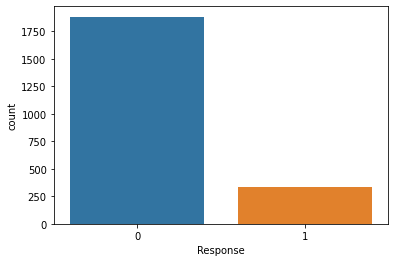

In [30]:
sns.countplot(x='Response',data=df)

# imbalance dataset`

What does that mean?
- we cannot not judge the model by the accuracy

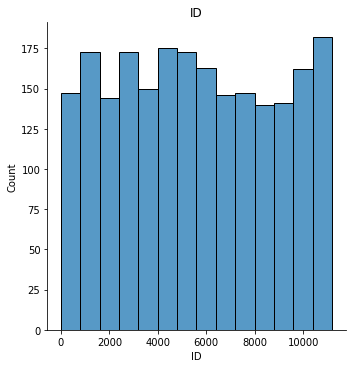

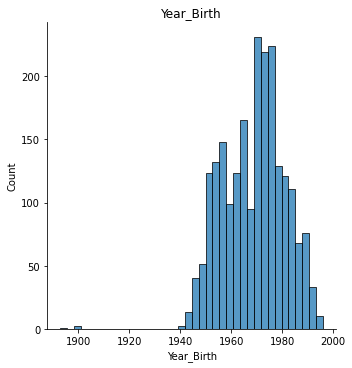

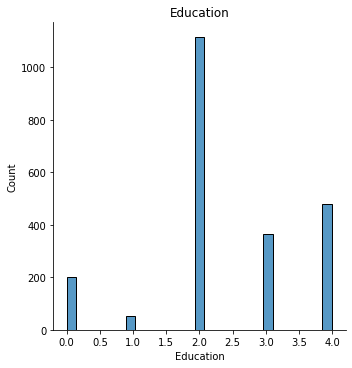

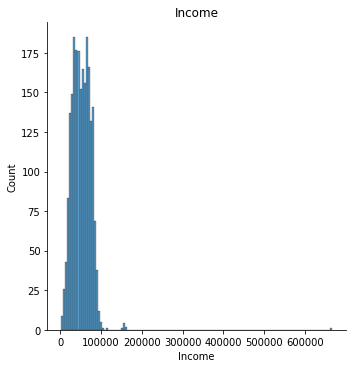

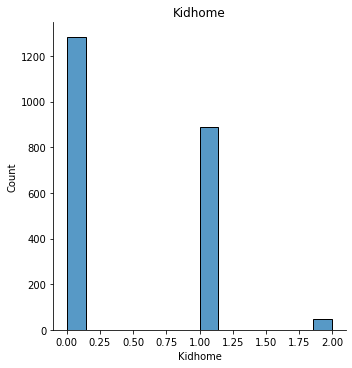

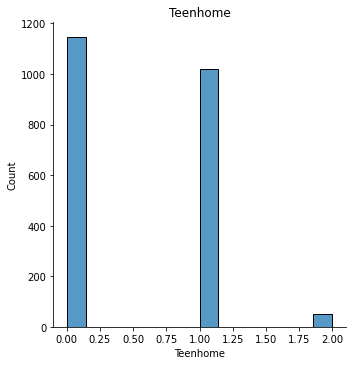

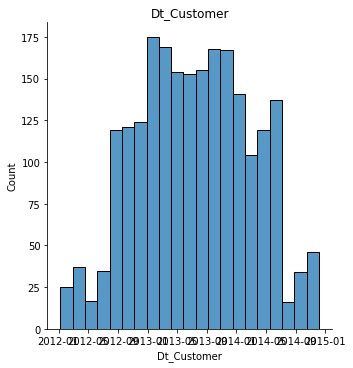

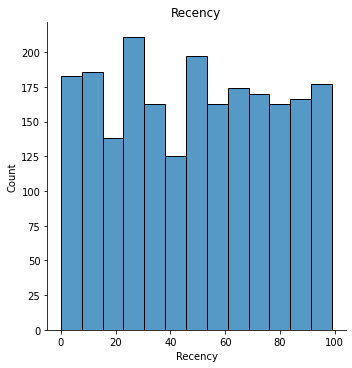

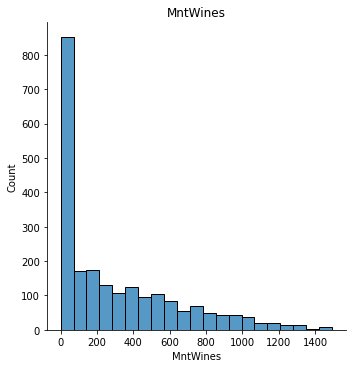

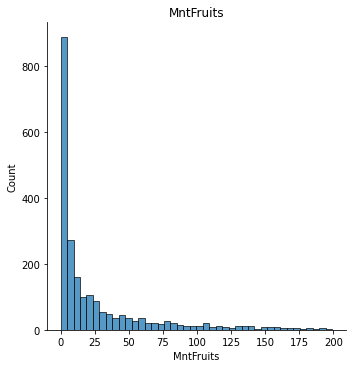

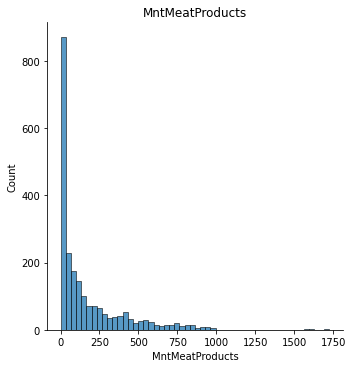

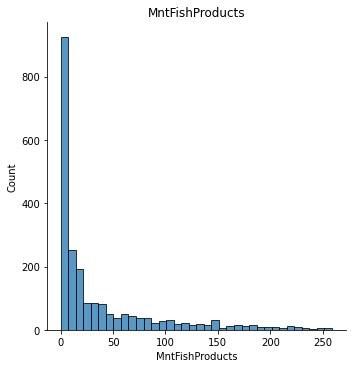

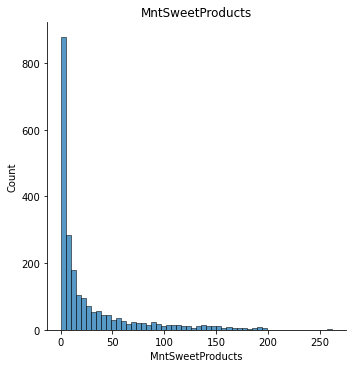

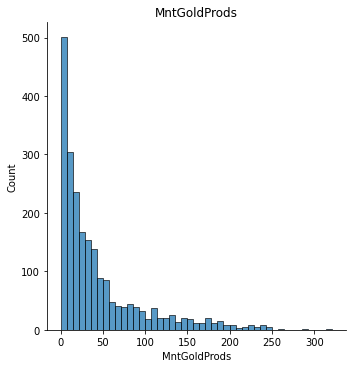

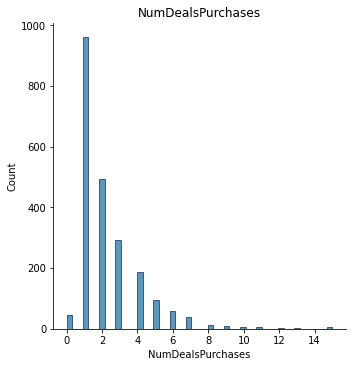

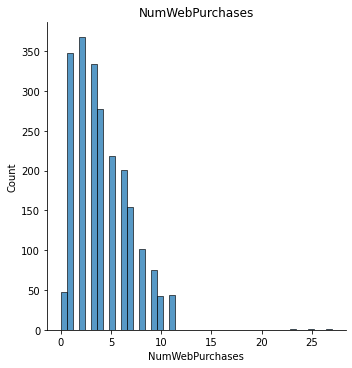

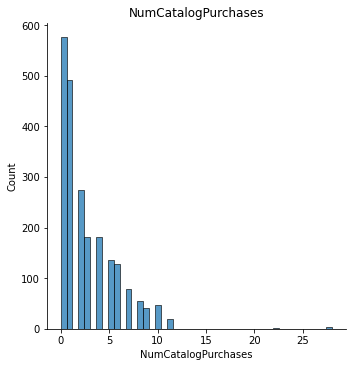

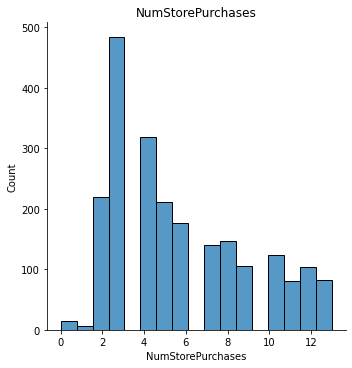

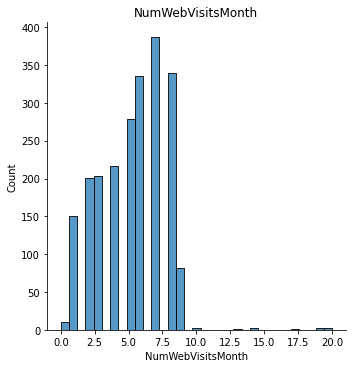

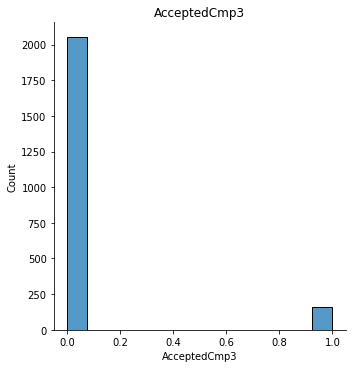

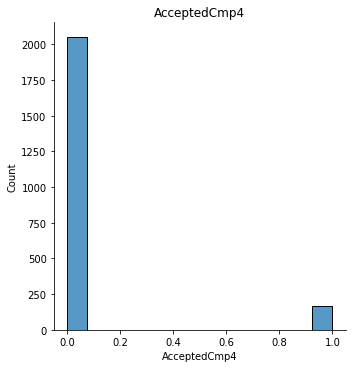

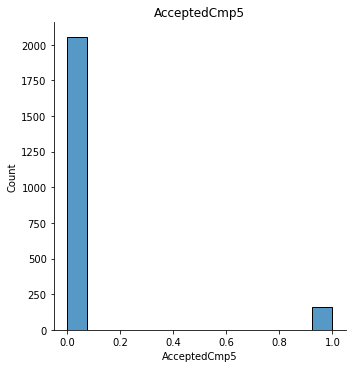

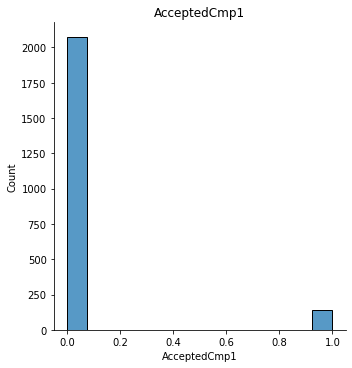

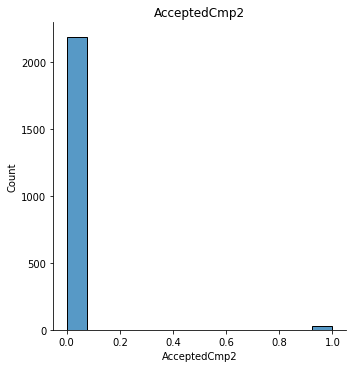

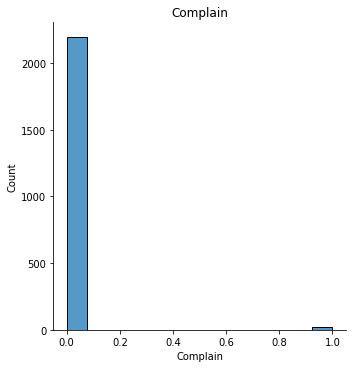

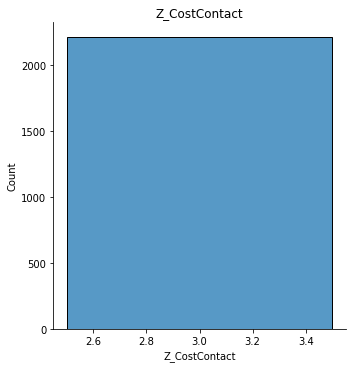

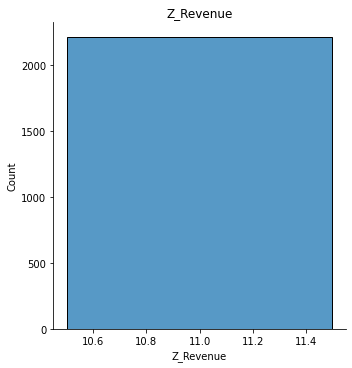

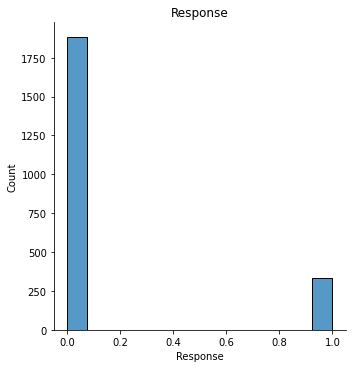

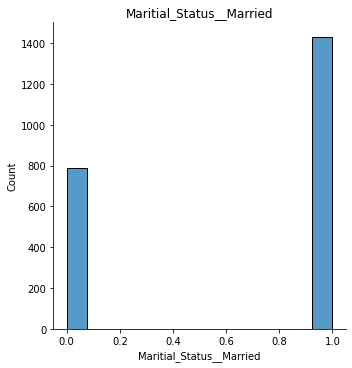

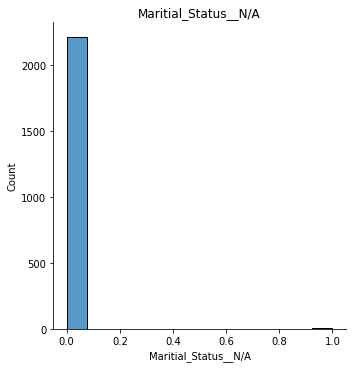

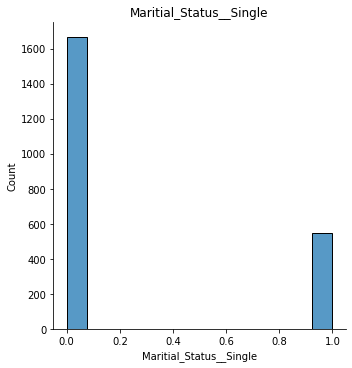

In [31]:
for x in df.columns:
    sns.displot(x=x,data=df)
    plt.title(x)
    plt.show()

## what is z_revenue and z_cost

In [32]:
z_df = [x for x in df.columns if 'Z_' in x]
z_df = df[z_df]
z_df

,Z_CostContact,Z_Revenue
0,3,11
1,3,11
2,3,11
3,3,11
4,3,11
...,...,...
2235,3,11
2236,3,11
2237,3,11
2238,3,11


In [33]:
for x in z_df.columns:
    print(x, df[x].nunique())

Z_CostContact 1
Z_Revenue 1


## Z_CostContact  and Z_Revenue only have 1 value so its constant and not needed

In [34]:
df.drop(z_df.columns,1,inplace=True)

In [35]:
df.describe()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Maritial_Status__Married,Maritial_Status__N/A,Maritial_Status__Single
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,2.393953,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,0.645307,0.001805,0.248195
std,3249.376275,11.985554,1.124141,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,0.478528,0.042457,0.432063
min,0.000000,1893.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,2.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,2.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8421.750000,1977.000000,3.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,11191.000000,1996.000000,4.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df.head(1)

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Maritial_Status__Married,Maritial_Status__N/A,Maritial_Status__Single
0,5524,1957,2,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,0,1


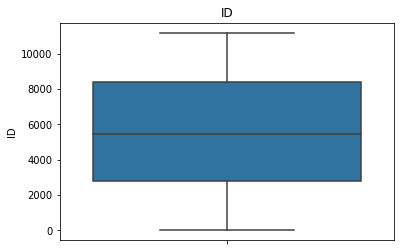

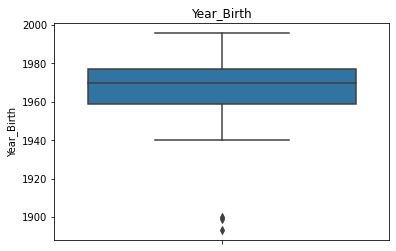

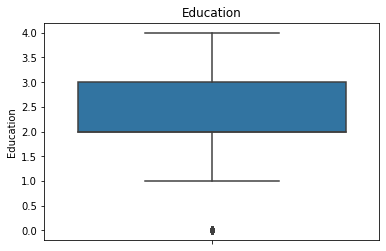

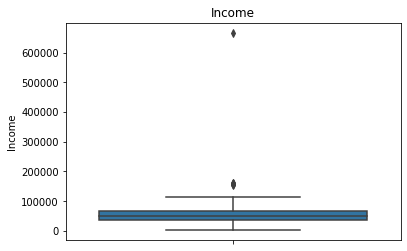

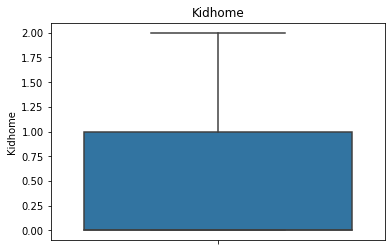

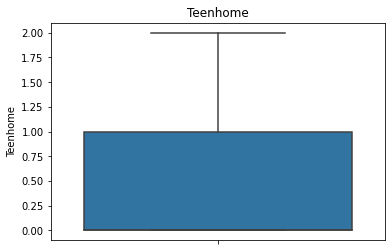

TypeError: Vertical orientation requires numeric `y` variable.

In [37]:
for x in df.columns:
    sns.boxplot(y=x,data=df)
    plt.title(x)
    plt.show()

In [ ]:
#stop

In [ ]:
X = data.drop(['Response','Dt_Customer'],1).values
y = data['Response'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=26)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)